In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [2]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_1_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase1harmonics = pd.DataFrame(dset['harmonics_i'])
phase1_2kHz = phase1harmonics.iloc[:,40:]

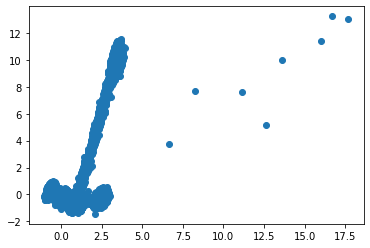

In [3]:
transformer = FactorAnalysis(n_components=2)
phase1_trans = transformer.fit_transform(phase1_2kHz)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1])
plt.show()

In [4]:
phase1_lf = phase1harmonics.iloc[:,:40]

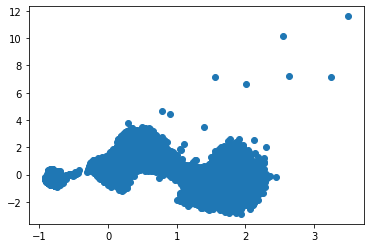

In [5]:
transformer_lf = FactorAnalysis(n_components=2)
phase1_lf_trans = transformer.fit_transform(phase1_lf)
plt.scatter(phase1_lf_trans[:,0], phase1_lf_trans[:,1])
plt.show()

In [6]:
phase1_2kHz

,40,41,42,43,44,45,46,47,48,49,...,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997
0,0.009003,0.049988,0.014999,0.028000,0.010002,0.039001,0.012001,0.037994,0.011002,0.009003,...,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
1,0.010002,0.045990,0.005001,0.022995,0.010002,0.029999,0.008003,0.032013,0.016006,0.020004,...,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
2,0.013000,0.050995,0.010002,0.026001,0.014999,0.033997,0.016998,0.032013,0.011002,0.016998,...,0.0,0.000,0.001,0.0,0.000,0.0,0.000,0.0,0.0,0.0
3,0.005001,0.049988,0.014000,0.028000,0.008003,0.029007,0.014999,0.032990,0.005001,0.011002,...,0.0,0.000,0.000,0.0,0.001,0.0,0.001,0.0,0.0,0.0
4,0.009003,0.053986,0.016006,0.018997,0.009003,0.036987,0.012001,0.029999,0.005001,0.016006,...,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168057,0.007000,0.024994,0.003000,0.031006,0.002001,0.024994,0.001000,0.024994,0.003000,0.011002,...,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
168058,0.006001,0.026001,0.003000,0.032013,0.002001,0.028000,0.002001,0.026993,0.004002,0.011002,...,0.0,0.001,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
168059,0.005001,0.032013,0.004002,0.032990,0.002001,0.032990,0.004002,0.028000,0.003000,0.009003,...,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
168060,0.006001,0.029007,0.004002,0.029999,0.002001,0.029007,0.003000,0.026001,0.005001,0.009003,...,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0


In [7]:
from sklearn.decomposition import PCA, KernelPCA

In [12]:
model = KernelPCA(n_components=2, kernel="rbf")

In [13]:
phase1_trans_lin = model.fit_transform(phase1_2kHz)

MemoryError: Unable to allocate 210. GiB for an array with shape (168062, 168062) and data type float64

In [14]:
sklearn.decomposition import SparsePCA

SyntaxError: invalid syntax (<ipython-input-14-9498543870e6>, line 1)

In [16]:
from sklearn.decomposition import SparsePCA

In [17]:
model = SparsePCA(n_components=2)

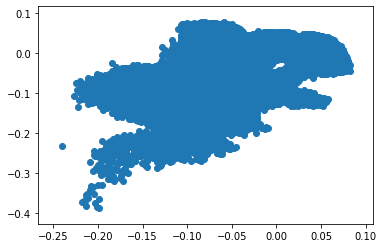

In [18]:
phase1_trans = model.fit_transform(phase1_2kHz)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1])
plt.show()

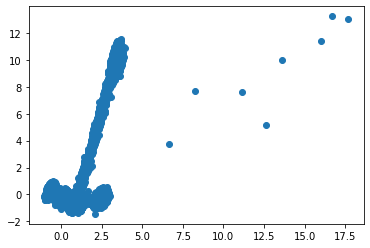

In [19]:
transformer = FactorAnalysis(n_components=2)
phase1_trans = transformer.fit_transform(phase1_2kHz)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1])
plt.show()

In [20]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(phase1_trans)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1], c=kmeans.labels_)
plt.show()

NameError: name 'KMeans' is not defined

In [21]:
from sklearn.cluster import KMeans

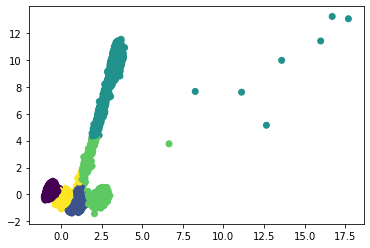

In [22]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(phase1_trans)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1], c=kmeans.labels_)
plt.show()

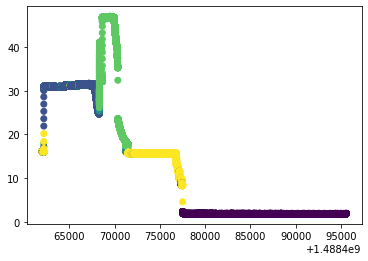

In [23]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\phase_1_2017-03-02.h5", "r") as f:
    dset = f["tenperiodtable"]
    timeaxis = dset["timestamp"]
    dataPhase0 = dset["rms_i"]
plt.scatter(timeaxis, dataPhase0, c=kmeans.labels_)
plt.show()

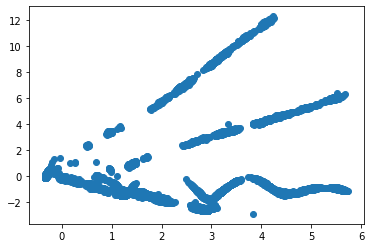

In [26]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_0_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase0harmonics = pd.DataFrame(dset['harmonics_i'])
phase0_2kHz = phase0harmonics.iloc[:,40:]
transformer = FactorAnalysis(n_components=2)
phase0_trans = transformer.fit_transform(phase0_2kHz)
plt.scatter(phase0_trans[:,0], phase0_trans[:,1])
plt.show()

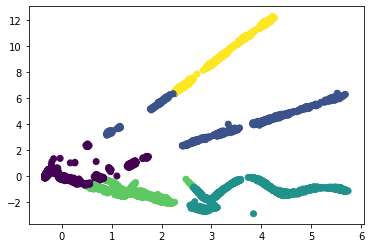

In [27]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(phase0_trans)
plt.scatter(phase0_trans[:,0], phase0_trans[:,1], c=kmeans.labels_)
plt.show()

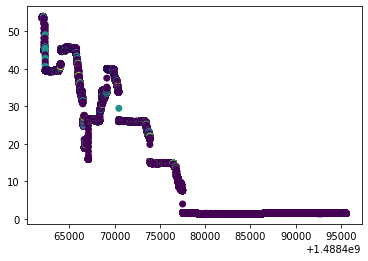

In [28]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\phase_0_2017-03-02.h5", "r") as f:
    dset = f["tenperiodtable"]
    timeaxis = dset["timestamp"]
    dataPhase0 = dset["rms_i"]
plt.scatter(timeaxis, dataPhase0, c=kmeans.labels_)
plt.show()

In [29]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_1_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase1harmonics = pd.DataFrame(dset['harmonics_i'])
phase1_2kHz = phase1harmonics.iloc[:,38:]

In [30]:
from sklearn import preprocessing

In [37]:
phase1normalized = min_max_scaler.fit_transform(phase1_2kHz)

In [38]:
phase1normalized

array([[0.12   , 0.4475 , 0.10004, ..., 0.     , 0.     , 0.     ],
       [0.1466 , 0.4475 , 0.11115, ..., 0.     , 0.     , 0.     ],
       [0.2266 , 0.4338 , 0.1444 , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.05334, 0.1873 , 0.05557, ..., 0.     , 0.     , 0.     ],
       [0.05334, 0.1826 , 0.06665, ..., 0.     , 0.     , 0.     ],
       [0.03998, 0.178  , 0.07776, ..., 0.     , 0.     , 0.     ]],
      dtype=float16)

In [39]:
model = PCA(2)

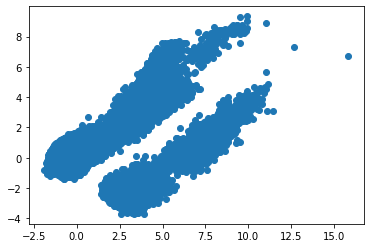

In [40]:
phase1normtrans = model.fit_transform(phase1normalized)
plt.scatter(phase1normtrans[:,0], phase1normtrans[:,1])
plt.show()